In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parameters
learning_rate = .1
training_epochs = 1000
display_step = 50

In [4]:
# Training Data
data = pd.read_csv('regression.csv', delimiter = ',')
X = data['X'].tolist()
Y = data['Y'].tolist()
train_X = np.asarray(X)
train_Y = np.asarray(Y)

# train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
#                          7.042,10.791,5.313,7.997,5.654,9.27,3.1])
# train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
#                          2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [6]:
# Graphs

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
rng = np.random
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Epoch: 0050 cost= 0.092413917 W= 0.28728512 b= 0.42180666
Epoch: 0100 cost= 0.084668316 W= 0.26242045 b= 0.60979354
Epoch: 0150 cost= 0.082400993 W= 0.24939564 b= 0.7082662
Epoch: 0200 cost= 0.081704468 W= 0.24257265 b= 0.75985074
Epoch: 0250 cost= 0.081474394 W= 0.23899874 b= 0.7868711
Epoch: 0300 cost= 0.081390858 W= 0.23712657 b= 0.8010253
Epoch: 0350 cost= 0.081357241 W= 0.23614581 b= 0.8084403
Epoch: 0400 cost= 0.081342414 W= 0.23563214 b= 0.81232387
Epoch: 0450 cost= 0.081335410 W= 0.23536298 b= 0.8143589
Epoch: 0500 cost= 0.081331976 W= 0.2352221 b= 0.8154238
Epoch: 0550 cost= 0.081330203 W= 0.2351482 b= 0.8159827
Epoch: 0600 cost= 0.081329294 W= 0.23510972 b= 0.8162737
Epoch: 0650 cost= 0.081328854 W= 0.23508921 b= 0.81642854
Epoch: 0700 cost= 0.081328586 W= 0.23507847 b= 0.8165099
Epoch: 0750 cost= 0.081328459 W= 0.23507333 b= 0.8165487
Epoch: 0800 cost= 0.081328407 W= 0.23507033 b= 0.8165714
Epoch: 0850 cost= 0.081328347 W= 0.23506883 b= 0.81658274
Epoch: 0900 cost= 0.0813283

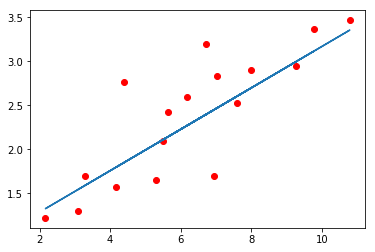

In [7]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
               "W=", sess.run(W), "b=", sess.run(b))

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')